In [3]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [4]:
TRAIN_DIR = '/home/r3tro/Downloads/DVG/train/'
TEST_DIR = '/home/r3tro/Downloads/DVG/test1/'

In [5]:
ROWS = 64
COLS = 64
CHANNELS = 3

In [6]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [7]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [8]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

In [9]:
X_train, y_train = prep_data(train_images)
X_test, y_test = prep_data(test_images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [10]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (25000, 64, 64, 3)
Test shape: (12500, 64, 64, 3)


In [11]:
X, y = shuffle(X_train, y_train)

In [12]:
X.shape

(25000, 64, 64, 3)

In [13]:
y.shape

(25000, 1)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train shape: {}".format(X_train.shape))
print("Train label shape: {}".format(y_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Validation label shape: {}".format(y_val.shape))

Train shape: (20000, 64, 64, 3)
Train label shape: (20000, 1)
Validation shape: (5000, 64, 64, 3)
Validation label shape: (5000, 1)


In [15]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


In [16]:
classes = {0: 'cat',
          1: 'dog'}

In [17]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

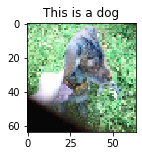

In [18]:
show_images(X_train, y_train, 0)

In [19]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255

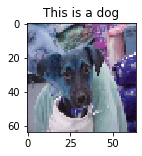

In [20]:
show_images(X_train_norm, y_train, 5)

In [21]:
modelx = Sequential()

modelx.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
modelx.add(MaxPooling2D(pool_size = (2,2)))

modelx.add(Conv2D(64, (3,3), activation='relu'))
modelx.add(MaxPooling2D(pool_size = (2,2)))
modelx.add(Dropout(0.4))

modelx.add(Conv2D(128, (3,3), activation='relu'))
modelx.add(MaxPooling2D(pool_size = (2,2)))
modelx.add(Dropout(0.4))

modelx.add(Conv2D(256, (3,3), activation='relu'))
modelx.add(MaxPooling2D(pool_size = (2,2)))
modelx.add(Dropout(0.4))

modelx.add(Conv2D(512, (1,1), activation='relu'))
#model6.add(MaxPooling2D(pool_size = (2,2)))

modelx.add(Flatten())
modelx.add(Dropout(0.4))

modelx.add(Dense(units=120, activation='relu'))
modelx.add(Dense(units=2, activation='sigmoid'))

In [22]:
modelx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelx.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)        

In [23]:
modelx.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=50, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.6689 - accuracy: 0.5796 - val_loss: 0.6725 - val_accuracy: 0.5492
Epoch 2/50
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6015 - accuracy: 0.6757 - val_loss: 0.5513 - val_accuracy: 0.7228
Epoch 3/50
20000/20000 [==============================] - 46s 2ms/step - loss: 0.5364 - accuracy: 0.7316 - val_loss: 0.4994 - val_accuracy: 0.7636
Epoch 4/50
20000/20000 [==============================] - 46s 2ms/step - loss: 0.4909 - accuracy: 0.7617 - val_loss: 0.4371 - val_accuracy: 0.8010
Epoch 5/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.4521 - accuracy: 0.7867 - val_loss: 0.4102 - val_accuracy: 0.8122
Epoch 6/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.4170 - accuracy: 0.8073 - val_loss: 0.3788 - val_accuracy: 0.8370
Epoch 7/50
20000/20000 [==============================] - 47s 2ms/ste

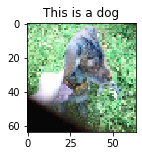

Our Model Prediction: [0]


In [28]:
image = X_train[0]
test_pred = modelx.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,0)

print("Our Model Prediction: {}".format(test_pred))

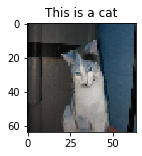

Our Model Prediction: [1]


In [29]:
image = X_train[100]
test_pred = modelx.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,100)

print("Our Model Prediction: {}".format(test_pred))

In [30]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,64,64,3)
  image_class = classes[model.predict_classes(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("Test {} : I think this is {}".format(idx, image_class))
  plt.show()

In [31]:
X_test, test_idx = prep_data(test_images)

X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


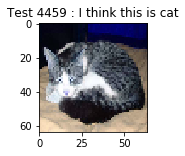

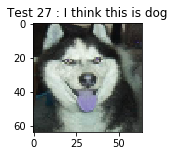

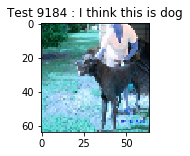

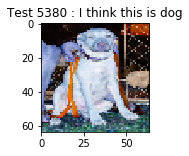

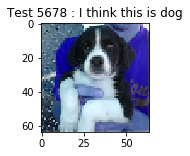

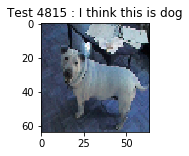

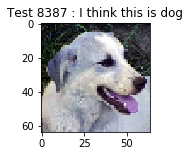

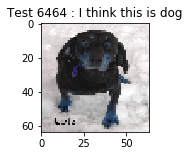

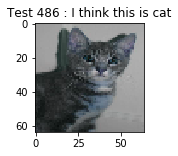

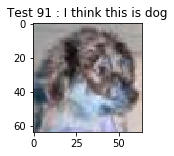

In [41]:
X_test_lr, test_idx = X_test, test_idx

for i in np.random.randint(0, len(X_test_lr), 10) :
  show_image_prediction(X_test_lr, i, modelx)